In [1]:
###··· TURBINE DATASET ···### 
# Part 1: Selecting and analyzing the dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


#Load the dataset
synthetic_dataset = pd.read_csv("A1-synthetic.txt", sep='\t', header=0)
x = synthetic_dataset[['#v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']]
y = synthetic_dataset[['z']]
#Scale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)
validation_percentage=0.15


Epoch  1 / 100
============= [loss:  0.0372  - mae:  0.1541  - val_loss:  0.0367  - val_mae:   0.1498 ]
Epoch  2 / 100
============= [loss:  0.0218  - mae:  0.1192  - val_loss:  0.0265  - val_mae:   0.1302 ]
Epoch  3 / 100
============= [loss:  0.0239  - mae:  0.1259  - val_loss:  0.0306  - val_mae:   0.1399 ]
Epoch  4 / 100
============= [loss:  0.0188  - mae:  0.1102  - val_loss:  0.0228  - val_mae:   0.1202 ]
Epoch  5 / 100
============= [loss:  0.0196  - mae:  0.1118  - val_loss:  0.0213  - val_mae:   0.1158 ]
Epoch  6 / 100
============= [loss:  0.0177  - mae:  0.1061  - val_loss:  0.0196  - val_mae:   0.1116 ]
Epoch  7 / 100
============= [loss:  0.0313  - mae:  0.1426  - val_loss:  0.0298  - val_mae:   0.1383 ]
Epoch  8 / 100
============= [loss:  0.0155  - mae:  0.0992  - val_loss:  0.0194  - val_mae:   0.1103 ]
Epoch  9 / 100
============= [loss:  0.0193  - mae:  0.1112  - val_loss:  0.0196  - val_mae:   0.1119 ]
Epoch  10 / 100
============= [loss:  0.0153  - mae:  0.0988  - 

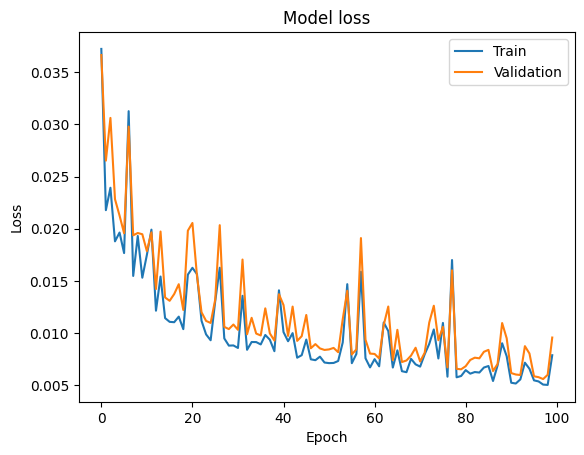

In [5]:
from matplotlib import pyplot as plt
from MyNeuralNetwork import MyNeuralNetwork

#Create the neural network and train
nn = MyNeuralNetwork(layers=[x_scaled.shape[1],9,5,1], nEpochs=100, learning_rate=0.001, momentum=0.005, activation='relu', validation_set=validation_percentage)
nn.fit(x_scaled, y_scaled)

# Optional: Plot the evolution of the training and validation errors  
(loss, val_loss) = nn.loss_epochs()
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *


# Part 3: Obtaining predictions
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=validation_percentage, shuffle=True)
y_pred_test = nn.predict(x_test)
y_pred_train = nn.predict(x_train)

print("---Test---")
print("R2 Score: ", r2_score(y_test, y_pred_test))
print("MSE: ", mean_squared_error(y_test, y_pred_test))
print("MAE: ", mean_absolute_error(y_test, y_pred_test))
print("---Train---")
print("R2 Score: ", r2_score(y_train, y_pred_train))
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("")
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred_test))

y_test_unscaled = scaler.inverse_transform(y_test)
y_pred_test_unscaled = scaler.inverse_transform(y_pred_test)
y_train_unscaled = scaler.inverse_transform(y_train)
y_pred_train_unscaled = scaler.inverse_transform(y_pred_train)

plt.scatter(y_train_unscaled, y_pred_train_unscaled, color="blue", label="Train")
plt.scatter(y_test_unscaled, y_pred_test_unscaled, color="red", label="Test")
plt.xlabel("actual Values")
plt.ylabel("Predition Values")
plt.title("Actual vs Prediction")
plt.plot(y, y, "--",color="black")
plt.legend()
plt.show()